In [1]:
# Vir : https://scikit-learn.org
# Predelano za UPK 2024

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(100),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

"""
    classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
    
"""

'\n    classifiers = [\n    KNeighborsClassifier(3),\n    SVC(kernel="linear", C=0.025, random_state=42),\n    SVC(gamma=2, C=1, random_state=42),\n    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),\n    DecisionTreeClassifier(max_depth=5, random_state=42),\n    RandomForestClassifier(\n        max_depth=5, n_estimators=10, max_features=1, random_state=42\n    ),\n    MLPClassifier(alpha=1, max_iter=1000, random_state=42),\n    AdaBoostClassifier(algorithm="SAMME", random_state=42),\n    GaussianNB(),\n    QuadraticDiscriminantAnalysis(),\n]\n    \n'

### 1. Dataset creation

In [3]:
# 1. CREATE TEST DATASETS

# https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py
X, y = make_classification(n_samples=1000,
                           n_features=2, n_redundant=0, n_informative=2,  n_clusters_per_class=1
                           )
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
dataset_2class = (X, y)


datasets = [
    dataset_2class,
    make_moons(n_samples=1000, noise=0.2),
    make_circles(n_samples=1000, noise=0.2, factor=0.5)
]

In [4]:

# 1.1 SPLIT SELECTED DATASET TO TRAIN AND TEST SET
dataset_select = 1
X, y = datasets[dataset_select]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

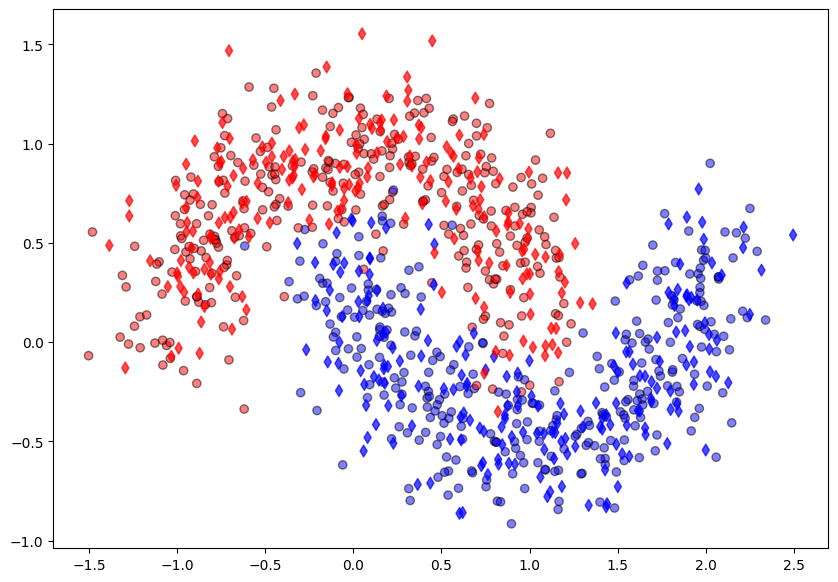

In [5]:
# 1.2 DATASET: VIZUALIZACIJA PODATKOV
RUN_DATAVIS = 1

# Colormaps
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

if RUN_DATAVIS > 0:

    figure = plt.figure(figsize=(10, 7))
    ax = plt.gca()

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               cmap=cm_bright, alpha=0.5, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.7, marker='d'
    )
    plt.show()
    # x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    # y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # ax.set_xlim(x_min, x_max)
    # ax.set_ylim(y_min, y_max)

## 2. Training and evaluating model 




Random Forest
{'0': {'precision': 0.9502487562189055, 'recall': 0.9317073170731708, 'f1-score': 0.9408866995073891, 'support': 205.0}, '1': {'precision': 0.9296482412060302, 'recall': 0.9487179487179487, 'f1-score': 0.9390862944162437, 'support': 195.0}, 'accuracy': 0.94, 'macro avg': {'precision': 0.9399484987124678, 'recall': 0.9402126328955598, 'f1-score': 0.9399864969618164, 'support': 400.0}, 'weighted avg': {'precision': 0.9402060051501288, 'recall': 0.94, 'f1-score': 0.9400090020254558, 'support': 400.0}}
              precision    recall  f1-score   support

           0      0.950     0.932     0.941       205
           1      0.930     0.949     0.939       195

    accuracy                          0.940       400
   macro avg      0.940     0.940     0.940       400
weighted avg      0.940     0.940     0.940       400



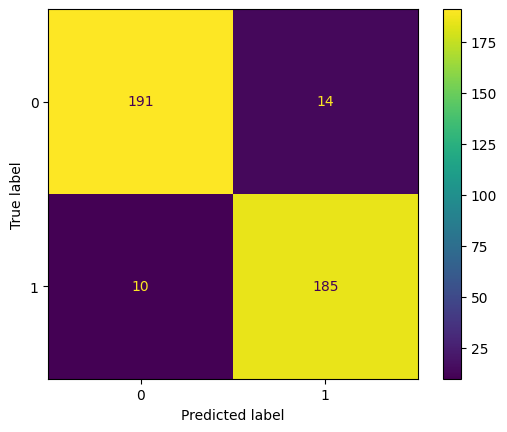

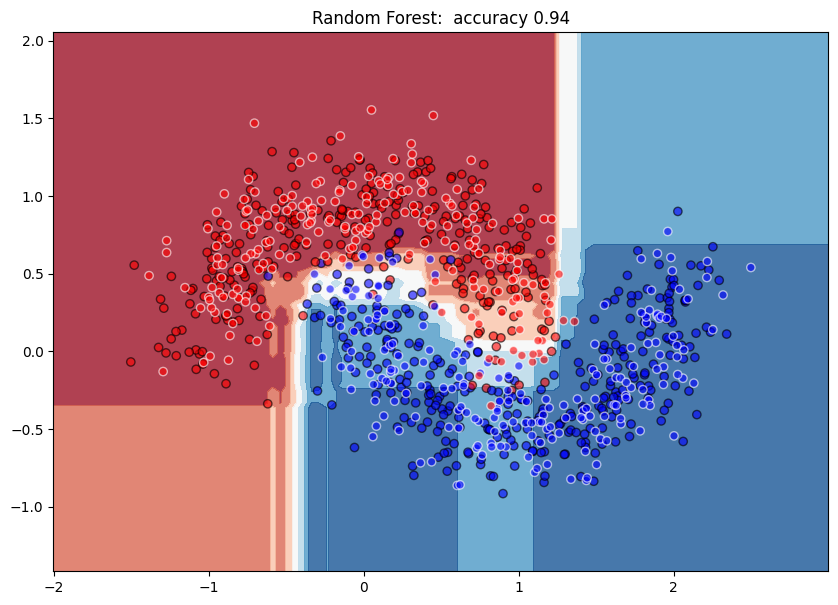

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# 2. TRAINING MODEL

# SELECT MODEL FOR TRAINING
model_select = 5
model = classifiers[model_select]
model_name = names[model_select]

RUN_TRAIN = 1

if RUN_TRAIN > 0:
    # TRAINING
    clf = make_pipeline(StandardScaler(), model)
    clf.fit(X_train, y_train)

    # TESTING
    y_pred = clf.predict(X_test)

    print(model_name)
    # EVALUATION
    cls_rep = classification_report(y_test, y_pred, digits=3, output_dict=True)
    print(cls_rep)

    print(classification_report(y_test, y_pred, digits=3))

    # Confusion matrix
    # https://en.wikipedia.org/wiki/Confusion_matrix
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

    # PLOT RESULTS
    figure = plt.figure(figsize=(10, 7))
    ax = plt.gca()
    ax.set_title(model_name + ':  accuracy ' + str(cls_rep['accuracy']))

    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               alpha=0.6, cmap=cm_bright, edgecolors="k")

    # Plot the testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="w",
        alpha=0.6
    )
    plt.show()
    # ax.set_xlim(x_min, x_max)
    # ax.set_ylim(y_min, y_max)

In [7]:
# TESTING
# Dodatne naloge:

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, classification_report, confusion_matrix
import seaborn as sns


def print_stats(classifier, model_name, x_test, y_test, y_pred, num_classes=2, normalize_cf=None, data_labels=[]):

    print(classification_report(y_test, y_pred, digits=3))

    plt.figure(figsize=(12, 3))
    ax1 = plt.subplot(1, 4, 1)

    if num_classes <= 2:
        display = PrecisionRecallDisplay.from_estimator(
            classifier, x_test, y_test, name=model_name, plot_chance_level=True, ax=ax1
        )
        _ = display.ax_.set_title("2-class Precision-Recall curve")
    ax2 = plt.subplot(1, 4, 2)

    if num_classes <= 2:
        svc_disp = RocCurveDisplay.from_estimator(
            classifier, x_test, y_test, ax=ax2)
    else:
        sns.heatmap(confusion_matrix(y_test, y_pred, normalize='pred'),
                    annot=True, fmt="1.3f", cmap="PiYG")
        ax3.set_xlabel('Precision')

    ax3 = plt.subplot(1, 4, 3)
    sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True,
                fmt="1.3f", cmap="PiYG")  # , yticklabels=d_labP, xticklabels=d_labT)
    ax3.set_xlabel('Recall')

    ax4 = plt.subplot(1, 4, 4)
    ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test,  ax=ax4)

    plt.show()

In [9]:
print_stats(clf, model_name, x_test, y_test, y_pred, num_classes = 2, normalize_cf=None, data_labels = []):

SyntaxError: invalid syntax (438052646.py, line 1)

## 3. Training with Cross-validation

++ RESULST FOLD  0
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.85      0.89      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

++ RESULST FOLD  1
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       100
           1       0.83      0.88      0.85       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

++ RESULST FOLD  2
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       100
           1       0.80      0.90      0.85       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg     

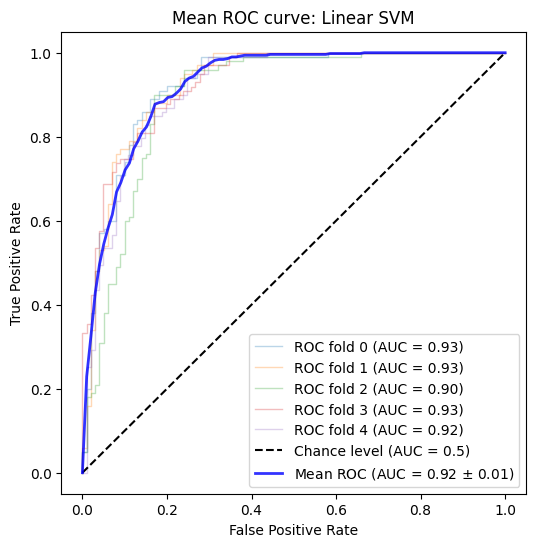

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py


# 2.2 CROSS VALIDATION :
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay, auc
RUN_CROSS_VAL = 1


n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)


if RUN_CROSS_VAL > 0:

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))

    for fold, (train, test) in enumerate(cv.split(X, y)):

        clf.fit(X[train], y[train])

        y_pred = clf.predict(X[test])
        print('++ RESULST FOLD ', fold)
        print(classification_report(y[test], y_pred))

        viz = RocCurveDisplay.from_estimator(
            clf,
            X[test],
            y[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
            plot_chance_level=(fold == n_splits - 1),
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr,  mean_tpr, color="b",  label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
            )

    ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"Mean ROC curve: "+model_name,
    )
    ax.legend(loc="lower right")
    plt.show()